In [1]:
import pandas as pd

anomal_data = pd.read_csv('../data/anomal_data.csv')
anomal_data

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,12939,C1,C20,C1,C18,A1,B1,9.106583e+05,5.444984e+04,anomal
1,32317,C1,C11,C1,C53,A1,B1,9.106530e+05,5.443921e+04,anomal
2,33365,W59,C13,P83,I73,I05,Q99,9.244552e+07,5.958504e+07,anomal
3,34058,C1,C11,C1,C91,A1,B1,9.106689e+05,5.444086e+04,anomal
4,34059,C1,C11,C1,C64,A1,B1,9.106316e+05,5.444328e+04,anomal
...,...,...,...,...,...,...,...,...,...,...
95,506926,U72,D58,E35,Y05,D53,F61,9.244551e+07,5.958505e+07,anomal
96,507636,C1,C11,C1,C70,A1,B1,9.106766e+05,5.444176e+04,anomal
97,528449,C89,S43,E40,Y34,L29,N28,9.244553e+07,5.958504e+07,anomal
98,528759,P36,V48,Z17,J68,Q50,J62,9.244554e+07,5.958504e+07,anomal


In [3]:
anomal_data_numerical = anomal_data[["DMBTR", "WRBTR"]]
anomal_data_numerical

,DMBTR,WRBTR
0,9.106583e+05,5.444984e+04
1,9.106530e+05,5.443921e+04
2,9.244552e+07,5.958504e+07
3,9.106689e+05,5.444086e+04
4,9.106316e+05,5.444328e+04
...,...,...
95,9.244551e+07,5.958505e+07
96,9.106766e+05,5.444176e+04
97,9.244553e+07,5.958504e+07
98,9.244554e+07,5.958504e+07


/var/folders/mz/1fcctw7n0d1b3ql1xgckmytc0000gn/T/ipykernel_47324/2261478453.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomal_data_numerical['Cluster'] = dbscan.fit_predict(anomal_data_numerical)


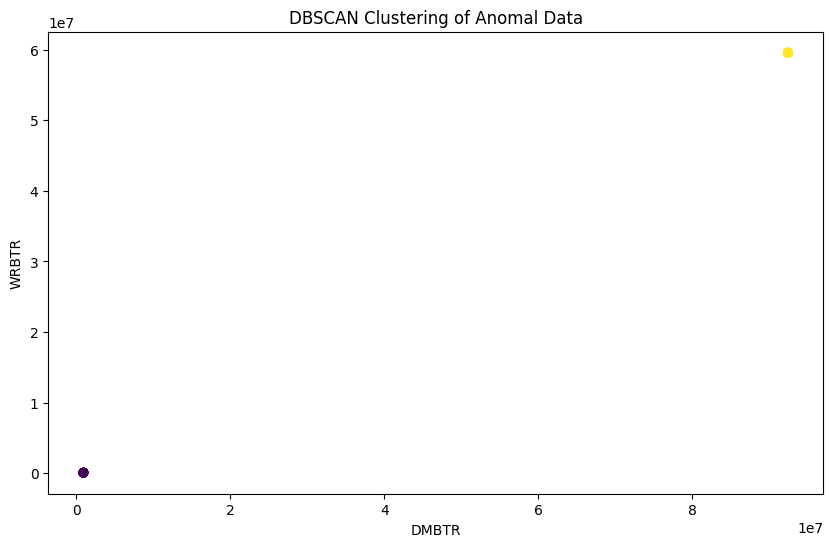

Cluster Means:


,DMBTR,WRBTR
Cluster,,
0,9.106507e+05,5.444366e+04
1,9.244552e+07,5.958504e+07


Cluster Variances:


,DMBTR,WRBTR
Cluster,,
0,112.707262,75.495749
1,93.592373,105.693126


Value Ranges:


,DMBTR,WRBTR
min,Cluster 0 9.106400e+05 1 9.244551e+07 Na...,Cluster 0 5.443497e+04 1 5.958503e+07 Na...
max,Cluster 0 9.106613e+05 1 9.244553e+07 Na...,Cluster 0 5.445235e+04 1 5.958505e+07 Na...



Number of Clusters: 2


,DMBTR,WRBTR,Cluster
0,9.106583e+05,5.444984e+04,0
1,9.106530e+05,5.443921e+04,0
2,9.244552e+07,5.958504e+07,1
3,9.106689e+05,5.444086e+04,0
4,9.106316e+05,5.444328e+04,0
...,...,...,...
95,9.244551e+07,5.958505e+07,1
96,9.106766e+05,5.444176e+04,0
97,9.244553e+07,5.958504e+07,1
98,9.244554e+07,5.958504e+07,1


In [12]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Assuming anomal_data_numerical is already defined
anomal_data_numerical = anomal_data[["DMBTR", "WRBTR"]]

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=100, min_samples=5)
anomal_data_numerical['Cluster'] = dbscan.fit_predict(anomal_data_numerical)

# Calculate mean and variance for each cluster
cluster_means = anomal_data_numerical.groupby('Cluster').mean()
cluster_variances = anomal_data_numerical.groupby('Cluster').var()

# Calculate the value range (mean ± standard deviation)
cluster_std = np.sqrt(cluster_variances)
value_ranges = {
    'DMBTR': {
        'min': cluster_means['DMBTR'] - cluster_std['DMBTR'],
        'max': cluster_means['DMBTR'] + cluster_std['DMBTR']
    },
    'WRBTR': {
        'min': cluster_means['WRBTR'] - cluster_std['WRBTR'],
        'max': cluster_means['WRBTR'] + cluster_std['WRBTR']
    }
}

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(anomal_data_numerical['DMBTR'], anomal_data_numerical['WRBTR'], c=anomal_data_numerical['Cluster'], cmap='viridis')
plt.xlabel('DMBTR')
plt.ylabel('WRBTR')
plt.title('DBSCAN Clustering of Anomal Data')
plt.show()

# Display cluster means, variances, and value ranges
print("Cluster Means:")
display(cluster_means)
print("Cluster Variances:")
display(cluster_variances)
print("Value Ranges:")
display(pd.DataFrame(value_ranges))

# Get the number of clusters
num_clusters = anomal_data_numerical['Cluster'].nunique()
print("\nNumber of Clusters:", num_clusters)

anomal_data_numerical